<a href="https://colab.research.google.com/github/pankaj90382/TSAI/blob/master/S7/S7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import sys
S10_PROJECT_PATH = '/content/drive/My Drive/Colab Notebooks/Github_Repo/The_School_of_AI/TSAI/TSAI/S10'
sys.path.append(S10_PROJECT_PATH+'/S10_Modular_Code/')
import os
os.chdir(S10_PROJECT_PATH+'/S10_Modular_Code/')

In [0]:
from __future__ import print_function
import torch
import torchvision
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
#!pip install torchsummary
from torchsummary import summary
import pandas as pd
import numpy as np
from utils import *

# Dataloader Arguments & Test/Train Dataloaders


In [5]:
# Downloading TrainSet
trainset = datasets.CIFAR10(root='./data', train=True,
                                        download=True)
# Downloading Testset
testset = datasets.CIFAR10(root='./data', train=False,
                                       download=True)

Files already downloaded and verified
Files already downloaded and verified


In [6]:
# Calculating Mean and Std dev
# We'd need to convert it into Numpy! Remember above we have converted it into tensors already
mean, std = get_meanstd(trainset, testset)

print(mean, std)


[0.49186878 0.48265391 0.44717728] [0.24697121 0.24338894 0.26159259]


In [7]:
!pip install -U git+https://github.com/albu/albumentations > /dev/null && echo "All libraries are successfully installed!"

  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-vgs_i2c1
All libraries are successfully installed!


In [0]:
from Album_Methods import Albumentations as AM

In [9]:
AM().transArguDetails("RandomRotate90", "HorizontalFlip", "ShiftScaleRotate", "GridDistortion", "Normalize")

RandomRotate90 : ArgSpec(args=['self', 'always_apply', 'p'], varargs=None, keywords=None, defaults=(False, 0.5)) ,
HorizontalFlip : ArgSpec(args=['self', 'always_apply', 'p'], varargs=None, keywords=None, defaults=(False, 0.5)) ,
ShiftScaleRotate : ArgSpec(args=['self', 'shift_limit', 'scale_limit', 'rotate_limit', 'interpolation', 'border_mode', 'value', 'mask_value', 'always_apply', 'p'], varargs=None, keywords=None, defaults=(0.0625, 0.1, 45, 1, 4, None, None, False, 0.5)) ,
GridDistortion : ArgSpec(args=['self', 'num_steps', 'distort_limit', 'interpolation', 'border_mode', 'value', 'mask_value', 'always_apply', 'p'], varargs=None, keywords=None, defaults=(5, 0.3, 1, 4, None, None, False, 0.5)) ,
Normalize : ArgSpec(args=['self', 'mean', 'std', 'max_pixel_value', 'always_apply', 'p'], varargs=None, keywords=None, defaults=((0.485, 0.456, 0.406), (0.229, 0.224, 0.225), 255.0, False, 1.0)) ,


In [0]:
train_args= {
'Cutout':{'num_holes':2, 'max_h_size':1, 'max_w_size':1, 'p':0.2},   
'RandomRotate90' : {},
'HorizontalFlip' : {},
'ShiftScaleRotate' : {'shift_limit':0.0625, 'scale_limit':0.2, 'rotate_limit':45, 'p':.2},
'GridDistortion' : {'num_steps':5},
'Normalize' : {'mean':mean, 'std':std}
}

test_args={
    'Normalize' : {'mean':mean, 'std':std}
}

In [0]:
# Train Phase transformations
train_transforms = AM().transform(**train_args)

# Test Phase transformations
test_transforms = AM().transform(**test_args)

In [12]:
from DataLoader import DataLoader

SEED = 1

# Downloading TrainSet
trainset = datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=train_transforms)

# Downloading Testset
testset = datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=test_transforms)

# Creating object of a class
dataloader= DataLoader(shuffle=True, batch_size=64, seed=SEED, num_workers=2, pin_memory=True)


# train data loader
trainloader = dataloader.load(trainset)

# test data loader
testloader = dataloader.load(testset)

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].



In [0]:
# classes in cifar 10
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Let us show some of the training images, for fun.



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([64, 3, 32, 32]) tensor([-0.1032, -0.1451, -0.1463]) tensor([0.9760, 0.9442, 0.9395])
 bird plane   cat   cat   car truck truck  bird  bird   cat  deer  frog horse   dog  ship  bird truck  bird  deer horse   car  ship   dog   dog   dog  bird horse  deer  frog   dog  frog   dog   cat   dog truck  bird   dog   cat  ship plane


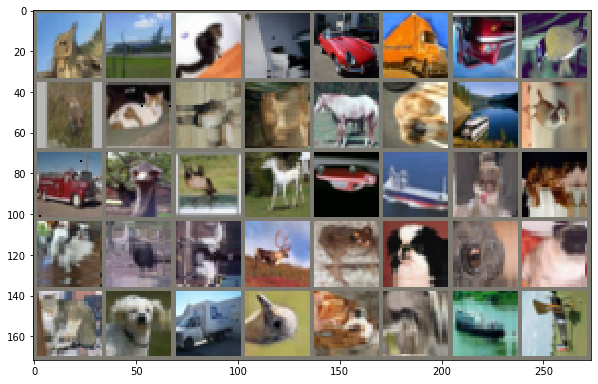

In [14]:
sample_images(trainloader, mean, std, classes, count=40)

2. Define a Convolution Neural Network
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Copy the neural network from the Neural Networks section before and modify it to
take 3-channel images (instead of 1-channel images as it was defined).



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


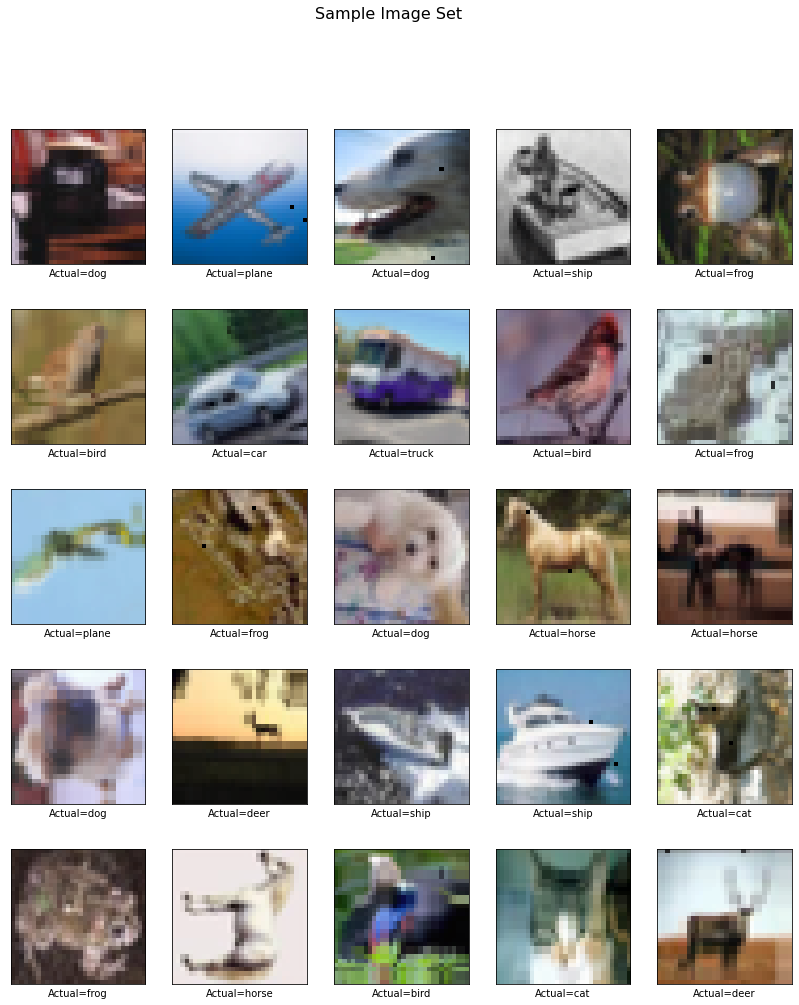

In [15]:
sample_images(trainloader, mean, std, classes, count=25, LabelClarity=True)

In [16]:
import torch.nn as nn
import torch.nn.functional as F
from Model import Resnet_Architecture
model = Resnet_Architecture(name="Model_LR_Finder", Model_Layers=18)
model.to(dataloader.device)
model.summary(input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

3. Define a Loss function and optimizer
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Let's use a Classification Cross-Entropy loss and SGD with momentum.



In [17]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from LRFinder import LR_Finder
Loss="CrossEntropyLoss"
EPOCHS = 1
model.device=dataloader.device
optimizer = optim.SGD(model.parameters(), lr=0.0000000001, momentum=0.9)
lrfinder = LR_Finder(optimizer)
optimizer, scheduler = lrfinder.range_test(start_lr=None, end_lr=10,num_iter=300,step_mode="exp", smooth_f=0.04, diverge_th=5)
#scheduler=StepLR(optimizer,step_size=5,gamma=0.1)
model.gotrain(optimizer=optimizer, train_loader=trainloader, test_loader=testloader, epochs=EPOCHS, statspath=S10_PROJECT_PATH+"/Save_Model/", scheduler=scheduler, batch_scheduler=lrfinder, L1lambda=0, LossType=Loss)

Batch=307 Loss=126.0589 Acc=14.40%:  39%|███▉      | 306/782 [00:42<01:05,  7.31it/s]

Stopping early, the loss has diverged
Validation loss decreased (100000.000000 --> 8722055860663.090820).  Saving model ...
Epoch: 1, Train set: Average loss: 0.0493, Accuracy: 14.40%; Test set: Average loss: 8722055860663.0908, Accuracy: 10.00%
Learning Rate = 18.057876



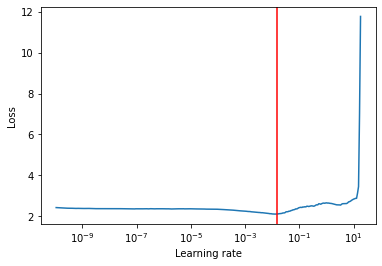

In [33]:
lrfinder.plot(title='LR_Finder_Curve', save_path=S10_PROJECT_PATH+"/Save_Model/", skip_start=0, skip_end=0, log_lr=True, show_lr=lrfinder.best_learn)

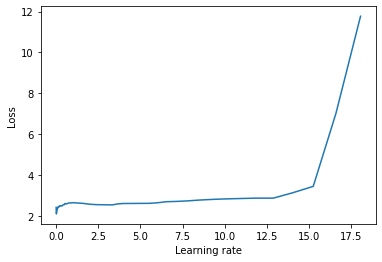

In [35]:
lrfinder.plot(title='LR_Finder_Curve', save_path=S10_PROJECT_PATH+"/Save_Model/", skip_start=0, skip_end=0, log_lr=False, show_lr=None)

In [19]:
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
model = Resnet_Architecture(name="Model_Res", Model_Layers=18)
model.to(dataloader.device)
Loss="CrossEntropyLoss"
EPOCHS = 50
model.device=dataloader.device
optimizer = optim.SGD(model.parameters(), lr=lrfinder.best_learn, weight_decay=0.0019 ,momentum=0.9)
scheduler = ReduceLROnPlateau(optimizer, mode="min", factor=0.1, patience=3, verbose=True, min_lr=1e-5)
#scheduler=StepLR(optimizer,step_size=5,gamma=0.1)
model.gotrain(optimizer=optimizer, train_loader=trainloader, test_loader=testloader, epochs=EPOCHS, statspath=S10_PROJECT_PATH+"/Save_Model/", scheduler=scheduler, batch_scheduler=False, L1lambda=0, LossType=Loss)

  0%|          | 0/782 [00:00<?, ?it/s]

Validation loss decreased (100000.000000 --> 1.785602).  Saving model ...
Epoch: 1, Train set: Average loss: 0.0276, Accuracy: 35.73%; Test set: Average loss: 1.7856, Accuracy: 47.57%
Learning Rate = 0.015020


  0%|          | 0/782 [00:00<?, ?it/s]

Validation loss decreased (1.785602 --> 1.454451).  Saving model ...
Epoch: 2, Train set: Average loss: 0.0224, Accuracy: 48.11%; Test set: Average loss: 1.4545, Accuracy: 58.55%
Learning Rate = 0.015020


  0%|          | 0/782 [00:00<?, ?it/s]

Validation loss decreased (1.454451 --> 1.106615).  Saving model ...
Epoch: 3, Train set: Average loss: 0.0191, Accuracy: 56.09%; Test set: Average loss: 1.1066, Accuracy: 68.54%
Learning Rate = 0.015020


  0%|          | 0/782 [00:00<?, ?it/s]

Validation loss decreased (1.106615 --> 1.052962).  Saving model ...
Epoch: 4, Train set: Average loss: 0.0174, Accuracy: 60.50%; Test set: Average loss: 1.0530, Accuracy: 70.37%
Learning Rate = 0.015020


  0%|          | 0/782 [00:00<?, ?it/s]

Validation loss decreased (1.052962 --> 1.019027).  Saving model ...
Epoch: 5, Train set: Average loss: 0.0162, Accuracy: 63.56%; Test set: Average loss: 1.0190, Accuracy: 71.71%
Learning Rate = 0.015020


  0%|          | 0/782 [00:00<?, ?it/s]

Validation loss decreased (1.019027 --> 0.854512).  Saving model ...
Epoch: 6, Train set: Average loss: 0.0152, Accuracy: 66.18%; Test set: Average loss: 0.8545, Accuracy: 76.19%
Learning Rate = 0.015020


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 7, Train set: Average loss: 0.0146, Accuracy: 67.28%; Test set: Average loss: 0.8952, Accuracy: 76.00%
Learning Rate = 0.015020


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 8, Train set: Average loss: 0.0140, Accuracy: 68.95%; Test set: Average loss: 0.9383, Accuracy: 74.23%
Learning Rate = 0.015020


  0%|          | 0/782 [00:00<?, ?it/s]

Validation loss decreased (0.854512 --> 0.842508).  Saving model ...
Epoch: 9, Train set: Average loss: 0.0138, Accuracy: 69.33%; Test set: Average loss: 0.8425, Accuracy: 76.64%
Learning Rate = 0.015020


  0%|          | 0/782 [00:00<?, ?it/s]

Validation loss decreased (0.842508 --> 0.821520).  Saving model ...
Epoch: 10, Train set: Average loss: 0.0134, Accuracy: 70.13%; Test set: Average loss: 0.8215, Accuracy: 77.36%
Learning Rate = 0.015020


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 11, Train set: Average loss: 0.0132, Accuracy: 70.64%; Test set: Average loss: 0.8696, Accuracy: 76.28%
Learning Rate = 0.015020


  0%|          | 0/782 [00:00<?, ?it/s]

Validation loss decreased (0.821520 --> 0.775894).  Saving model ...
Epoch: 12, Train set: Average loss: 0.0131, Accuracy: 71.44%; Test set: Average loss: 0.7759, Accuracy: 78.89%
Learning Rate = 0.015020


  0%|          | 0/782 [00:00<?, ?it/s]

Validation loss decreased (0.775894 --> 0.762817).  Saving model ...
Epoch: 13, Train set: Average loss: 0.0128, Accuracy: 71.81%; Test set: Average loss: 0.7628, Accuracy: 79.28%
Learning Rate = 0.015020


  0%|          | 0/782 [00:00<?, ?it/s]

Validation loss decreased (0.762817 --> 0.703412).  Saving model ...
Epoch: 14, Train set: Average loss: 0.0127, Accuracy: 71.93%; Test set: Average loss: 0.7034, Accuracy: 80.99%
Learning Rate = 0.015020


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 15, Train set: Average loss: 0.0125, Accuracy: 72.31%; Test set: Average loss: 0.7953, Accuracy: 78.15%
Learning Rate = 0.015020


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 16, Train set: Average loss: 0.0124, Accuracy: 72.48%; Test set: Average loss: 0.8124, Accuracy: 77.75%
Learning Rate = 0.015020


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 17, Train set: Average loss: 0.0123, Accuracy: 72.93%; Test set: Average loss: 0.7565, Accuracy: 79.67%
Learning Rate = 0.015020


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 18, Train set: Average loss: 0.0122, Accuracy: 73.20%; Test set: Average loss: 0.9020, Accuracy: 75.31%
Epoch    18: reducing learning rate of group 0 to 1.5020e-03.
Learning Rate = 0.015020


Batch=14858 Loss=0.6679 Acc=80.38%: 100%|██████████| 782/782 [01:47<00:00,  7.28it/s]


Validation loss decreased (0.703412 --> 0.425618).  Saving model ...
Epoch: 19, Train set: Average loss: 0.0091, Accuracy: 80.38%; Test set: Average loss: 0.4256, Accuracy: 88.44%
Learning Rate = 0.001502


Batch=15640 Loss=0.3385 Acc=82.34%: 100%|██████████| 782/782 [01:49<00:00,  7.17it/s]


Validation loss decreased (0.425618 --> 0.407047).  Saving model ...
Epoch: 20, Train set: Average loss: 0.0081, Accuracy: 82.34%; Test set: Average loss: 0.4070, Accuracy: 89.27%
Learning Rate = 0.001502


  0%|          | 0/782 [00:00<?, ?it/s]

Validation loss decreased (0.407047 --> 0.382532).  Saving model ...
Epoch: 21, Train set: Average loss: 0.0077, Accuracy: 83.32%; Test set: Average loss: 0.3825, Accuracy: 89.65%
Learning Rate = 0.001502


  0%|          | 0/782 [00:00<?, ?it/s]

Validation loss decreased (0.382532 --> 0.374953).  Saving model ...
Epoch: 22, Train set: Average loss: 0.0075, Accuracy: 83.57%; Test set: Average loss: 0.3750, Accuracy: 90.04%
Learning Rate = 0.001502


  0%|          | 0/782 [00:00<?, ?it/s]

Validation loss decreased (0.374953 --> 0.365234).  Saving model ...
Epoch: 23, Train set: Average loss: 0.0071, Accuracy: 84.50%; Test set: Average loss: 0.3652, Accuracy: 89.96%
Learning Rate = 0.001502


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 24, Train set: Average loss: 0.0070, Accuracy: 84.55%; Test set: Average loss: 0.3737, Accuracy: 90.13%
Learning Rate = 0.001502


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 25, Train set: Average loss: 0.0068, Accuracy: 85.15%; Test set: Average loss: 0.3689, Accuracy: 90.36%
Learning Rate = 0.001502


  0%|          | 0/782 [00:00<?, ?it/s]

Validation loss decreased (0.365234 --> 0.347797).  Saving model ...
Epoch: 26, Train set: Average loss: 0.0067, Accuracy: 85.42%; Test set: Average loss: 0.3478, Accuracy: 90.48%
Learning Rate = 0.001502


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 27, Train set: Average loss: 0.0066, Accuracy: 85.53%; Test set: Average loss: 0.3527, Accuracy: 90.20%
Learning Rate = 0.001502


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 28, Train set: Average loss: 0.0065, Accuracy: 86.17%; Test set: Average loss: 0.3561, Accuracy: 90.67%
Learning Rate = 0.001502


  0%|          | 0/782 [00:00<?, ?it/s]

Validation loss decreased (0.347797 --> 0.346459).  Saving model ...
Epoch: 29, Train set: Average loss: 0.0064, Accuracy: 86.26%; Test set: Average loss: 0.3465, Accuracy: 90.52%
Learning Rate = 0.001502


  0%|          | 0/782 [00:00<?, ?it/s]

Validation loss decreased (0.346459 --> 0.330937).  Saving model ...
Epoch: 30, Train set: Average loss: 0.0063, Accuracy: 86.33%; Test set: Average loss: 0.3309, Accuracy: 91.14%
Learning Rate = 0.001502


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 31, Train set: Average loss: 0.0062, Accuracy: 86.61%; Test set: Average loss: 0.3327, Accuracy: 90.79%
Learning Rate = 0.001502


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 32, Train set: Average loss: 0.0061, Accuracy: 86.82%; Test set: Average loss: 0.3421, Accuracy: 90.90%
Learning Rate = 0.001502


  0%|          | 0/782 [00:00<?, ?it/s]

Validation loss decreased (0.330937 --> 0.325884).  Saving model ...
Epoch: 33, Train set: Average loss: 0.0061, Accuracy: 86.93%; Test set: Average loss: 0.3259, Accuracy: 90.89%
Learning Rate = 0.001502


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 34, Train set: Average loss: 0.0060, Accuracy: 86.92%; Test set: Average loss: 0.3651, Accuracy: 90.15%
Learning Rate = 0.001502


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 35, Train set: Average loss: 0.0059, Accuracy: 87.21%; Test set: Average loss: 0.3406, Accuracy: 91.04%
Learning Rate = 0.001502


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 36, Train set: Average loss: 0.0059, Accuracy: 87.13%; Test set: Average loss: 0.3565, Accuracy: 90.48%
Learning Rate = 0.001502


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 37, Train set: Average loss: 0.0059, Accuracy: 87.47%; Test set: Average loss: 0.3648, Accuracy: 90.12%
Epoch    37: reducing learning rate of group 0 to 1.5020e-04.
Learning Rate = 0.001502


  0%|          | 0/782 [00:00<?, ?it/s]

Validation loss decreased (0.325884 --> 0.286123).  Saving model ...
Epoch: 38, Train set: Average loss: 0.0052, Accuracy: 89.09%; Test set: Average loss: 0.2861, Accuracy: 91.96%
Learning Rate = 0.000150


  0%|          | 0/782 [00:00<?, ?it/s]

Validation loss decreased (0.286123 --> 0.282552).  Saving model ...
Epoch: 39, Train set: Average loss: 0.0047, Accuracy: 89.97%; Test set: Average loss: 0.2826, Accuracy: 92.27%
Learning Rate = 0.000150


  0%|          | 0/782 [00:00<?, ?it/s]

Validation loss decreased (0.282552 --> 0.280743).  Saving model ...
Epoch: 40, Train set: Average loss: 0.0047, Accuracy: 90.18%; Test set: Average loss: 0.2807, Accuracy: 92.44%
Learning Rate = 0.000150


  0%|          | 0/782 [00:00<?, ?it/s]

Validation loss decreased (0.280743 --> 0.273021).  Saving model ...
Epoch: 41, Train set: Average loss: 0.0046, Accuracy: 90.25%; Test set: Average loss: 0.2730, Accuracy: 92.50%
Learning Rate = 0.000150


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 42, Train set: Average loss: 0.0045, Accuracy: 90.55%; Test set: Average loss: 0.2780, Accuracy: 92.48%
Learning Rate = 0.000150


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 43, Train set: Average loss: 0.0044, Accuracy: 90.67%; Test set: Average loss: 0.2784, Accuracy: 92.59%
Learning Rate = 0.000150


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 44, Train set: Average loss: 0.0043, Accuracy: 90.91%; Test set: Average loss: 0.2786, Accuracy: 92.73%
Learning Rate = 0.000150


Batch=35009 Loss=0.2040 Acc=90.96%:  77%|███████▋  | 600/782 [01:22<00:25,  7.20it/s]

Buffered data was truncated after reaching the output size limit.

In [0]:
#model.device=dataloader.device
#model = model_builder(model_class=Resnet_Architecture, weights_path=S10_PROJECT_PATH+'/Save_Model/Model.pt', local_device=model.device)

In [21]:
class_acurracy(model, model.device, trainloader, classes)

Accuracy of plane : 93 %
Accuracy of   car : 96 %
Accuracy of  bird : 88 %
Accuracy of   cat : 84 %
Accuracy of  deer : 92 %
Accuracy of   dog : 87 %
Accuracy of  frog : 95 %
Accuracy of horse : 93 %
Accuracy of  ship : 96 %
Accuracy of truck : 93 %


In [0]:
MisClassifiedImages, MisClassifiedPredLabels, MisClassifiedTargLabels = get_classified_images(model, model.device, testloader, classification='Miss')

In [0]:
CorrClassifiedImages, CorrClassifiedPredLabels, CorrClassifiedTargLabels = get_classified_images(model, model.device, testloader, classification='Corr')

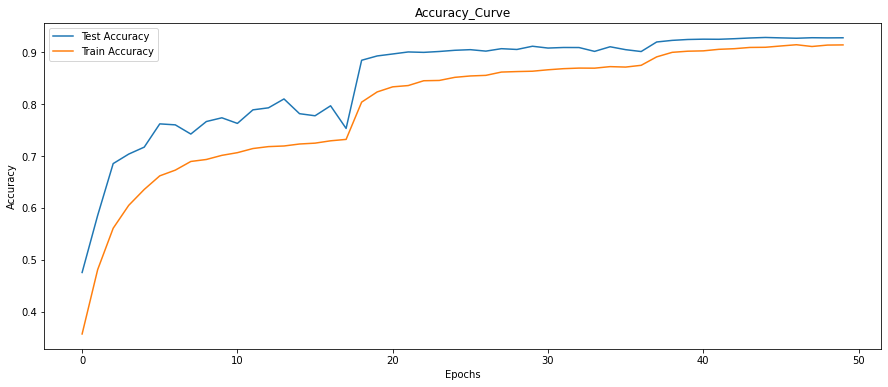

In [24]:
#cols = ["batch_train_loss", "batch_train_acc", "batch_lr","avg_test_loss", "test_acc", "train_acc", "avg_train_loss", "lr", "best_test_loss", "epochs"]
plot_graph(load_path=S10_PROJECT_PATH+'/Save_Model/Model_Res_stats.json', cols=["test_acc", "train_acc"], legend_arr=['Test Accuracy', 'Train Accuracy'], xlabel='Epochs', ylabel='Accuracy', title='Accuracy_Curve', save_path=S10_PROJECT_PATH+'/Save_Model/')

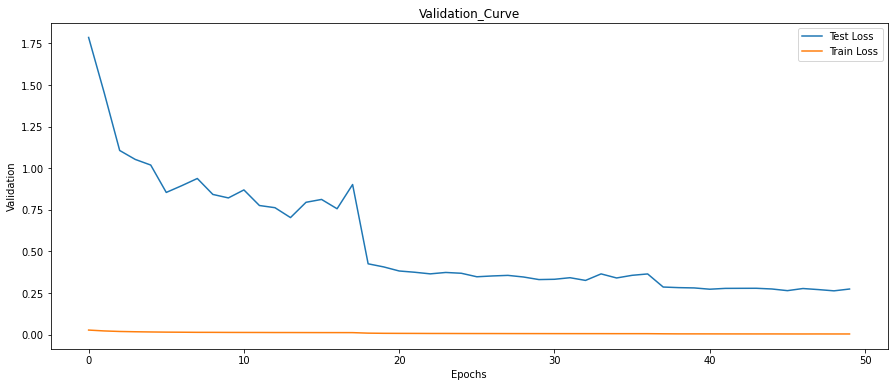

In [25]:
plot_graph(load_path=S10_PROJECT_PATH+'/Save_Model/Model_Res_stats.json', cols=["avg_test_loss","avg_train_loss"], legend_arr=['Test Loss', 'Train Loss'], xlabel='Epochs', ylabel='Validation', title='Validation_Curve', save_path=S10_PROJECT_PATH+'/Save_Model/')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


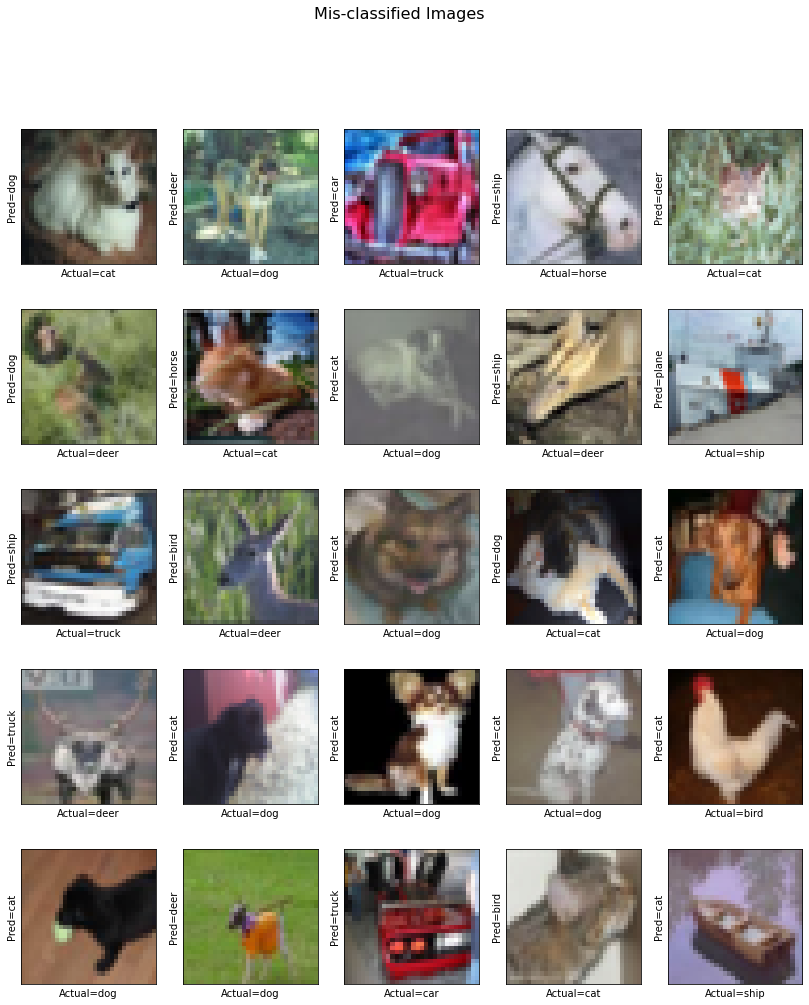

In [26]:
show_classified(MisClassifiedImages, MisClassifiedPredLabels, MisClassifiedTargLabels, classes, mean, std,"Mis-classified Images",S10_PROJECT_PATH+'/Save_Model/',25)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


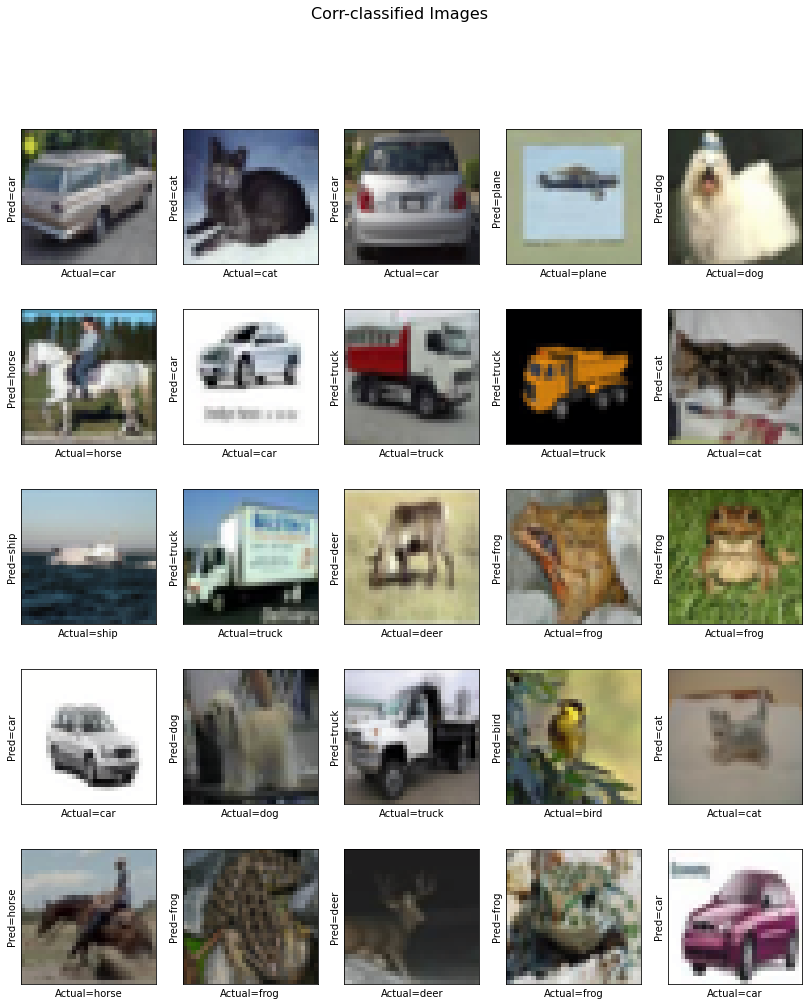

In [27]:
show_classified(CorrClassifiedImages, CorrClassifiedPredLabels, CorrClassifiedTargLabels, classes, mean, std,"Corr-classified Images",S10_PROJECT_PATH+'/Save_Model/',25)

In [0]:
from GradCam import VisualizeCam

In [0]:
target_layers = ["resnet_arch.layer1", "resnet_arch.layer2", "resnet_arch.layer3", "resnet_arch.layer4"]
viz_cam = VisualizeCam(model, classes, target_layers)

torch.Size([25, 10])
Generating Grad-CAM @resnet_arch.layer1
Generating Grad-CAM @resnet_arch.layer2
Generating Grad-CAM @resnet_arch.layer3
Generating Grad-CAM @resnet_arch.layer4


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

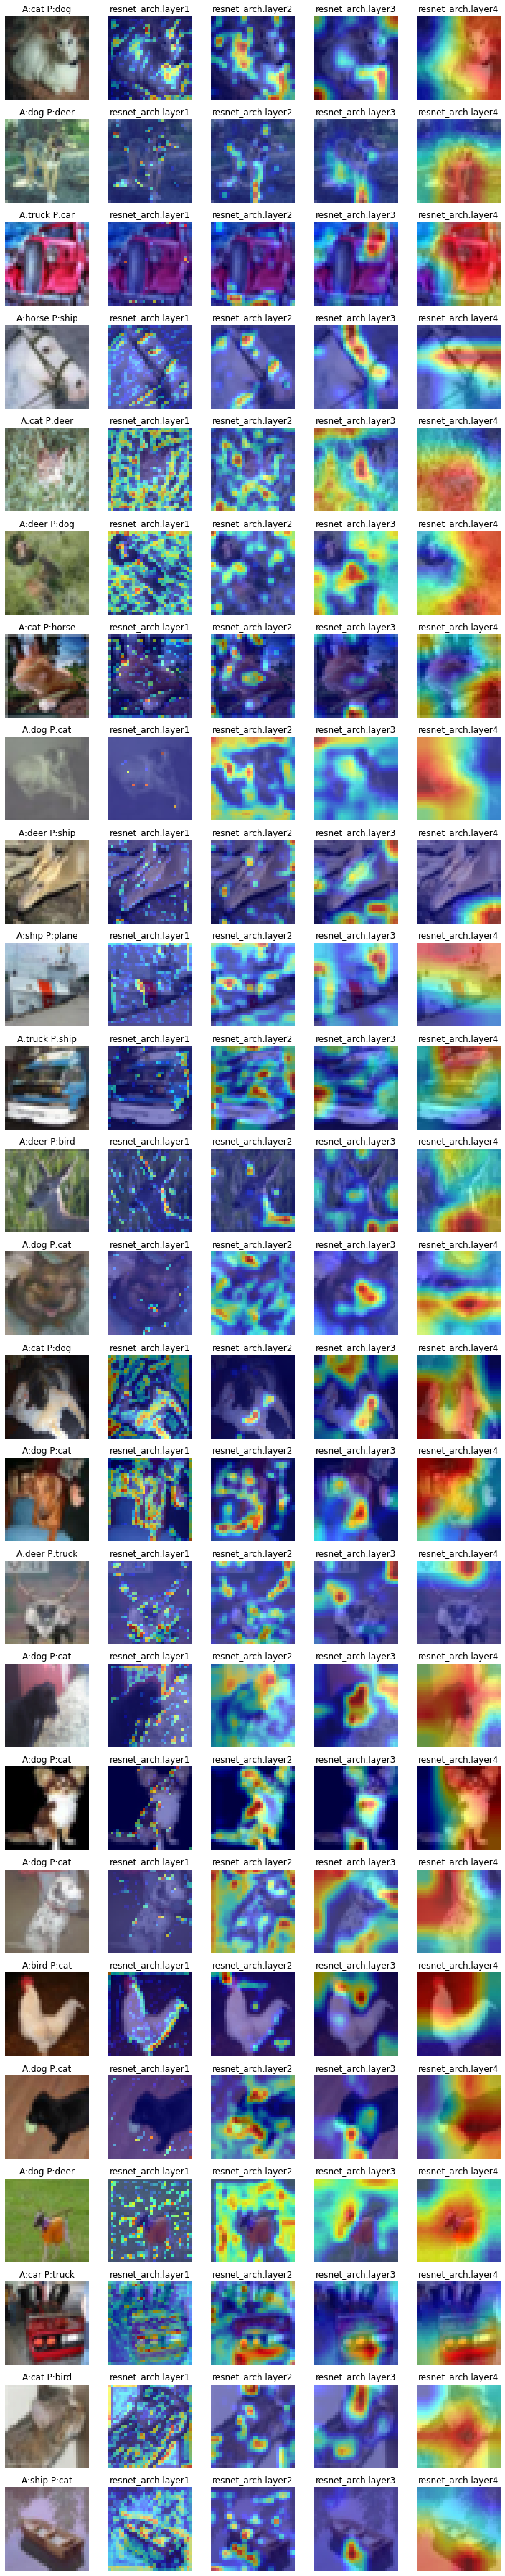

In [30]:
viz_cam(MisClassifiedImages[:25], MisClassifiedTargLabels[:25], target_layers, mean, std, target_inds=MisClassifiedTargLabels[:25], metric="Incorrect", per_image=False, path=S10_PROJECT_PATH+"/Save_Model/")

torch.Size([25, 10])
Generating Grad-CAM @resnet_arch.layer1
Generating Grad-CAM @resnet_arch.layer2
Generating Grad-CAM @resnet_arch.layer3
Generating Grad-CAM @resnet_arch.layer4


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

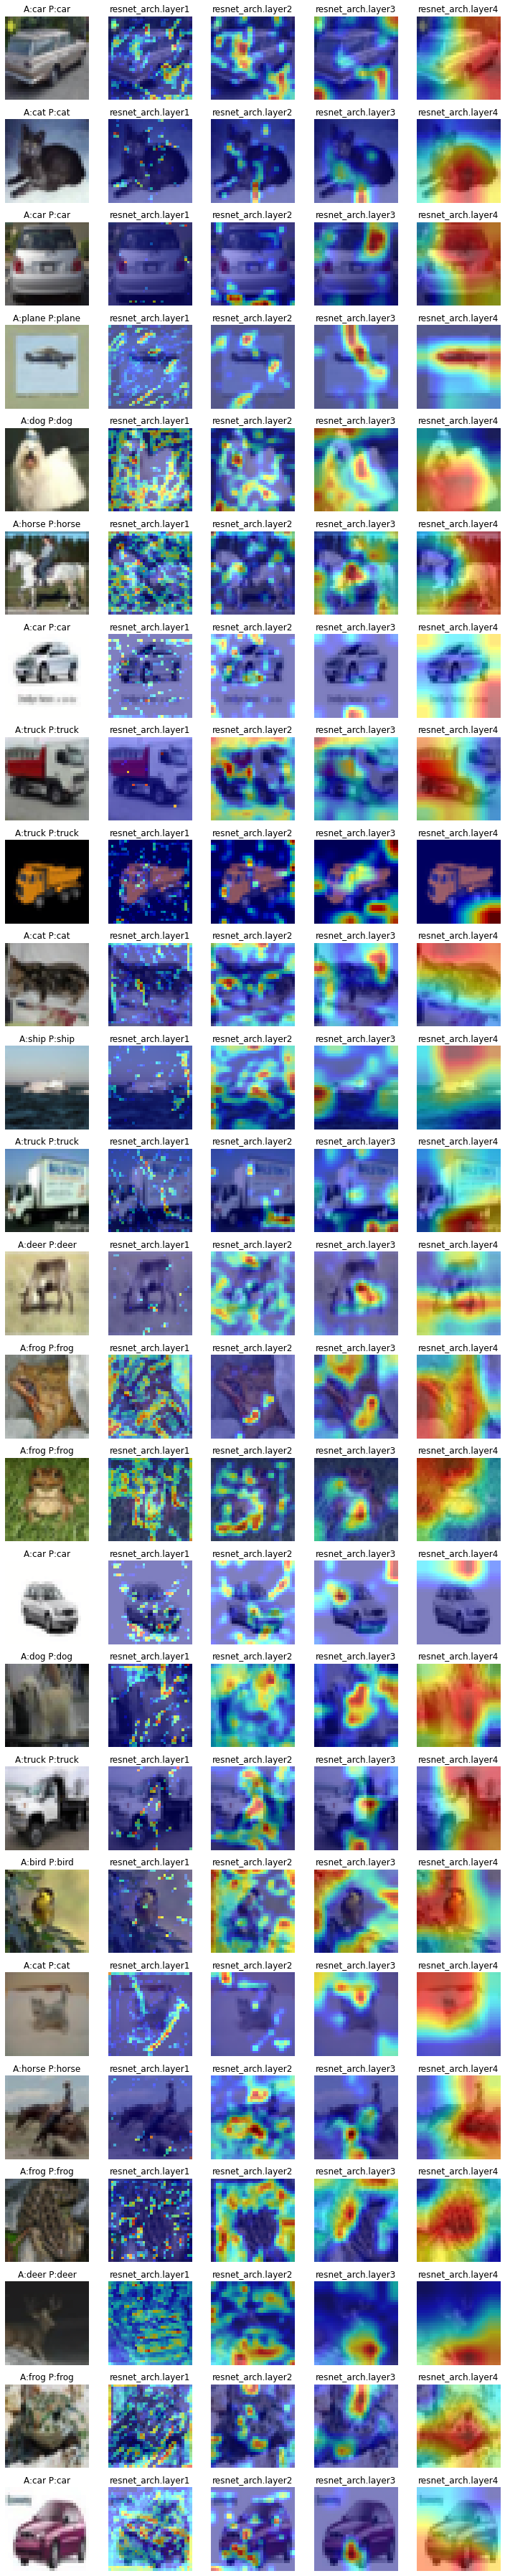

In [31]:
viz_cam(CorrClassifiedImages[:25], CorrClassifiedTargLabels[:25], target_layers, mean, std, target_inds=None, metric="Correct", per_image=False, path=S10_PROJECT_PATH+"/Save_Model/")